# Data Understanding
Dataset yang digunakan dalam analisis ini Bernama  [Global Cancer Patients](https://www.kaggle.com/datasets/zahidmughal2343/global-cancer-patients-2015-2024) berisi informasi terkait kanker, yang mencakup berbagai fitur diagnostik yang membantu dalam menentukan apakah suatu kasus bersifat jinak atau ganas.

## Informasi Dataset
Dataset ini berisi informasi mengenai 50.000 pasien kanker dari berbagai negara pada rentang tahun 2015 hingga 2024. Masing-masing baris dalam dataset mewakili satu individu pasien, lengkap dengan data demografis, faktor risiko, jenis kanker yang diderita, serta hasil pengobatan. Total terdapat 15 kolom atau fitur dalam dataset ini.

Fitur - Fitur yang terdapat pada dataset ini yaitu:

- Patient_ID = ID unik untuk mengidentifikasi setiap pasien secara individual.         
- Age = Usia pasien saat data dikumpulkan.                 
- Gender = Jenis kelamin pasien (contoh: Male, Female, Other).                 
- Country_Region = Negara atau wilayah asal pasien.          
- Year = Tahun data dicatat (antara 2015–2024).                     
- Genetic_Risk = Skor atau tingkat risiko genetik terhadap kanker (numerik).           
- Air_Pollution = Tingkat paparan terhadap polusi udara di lingkungan tempat tinggal pasien (numerik).          
- Alcohol_Use = Tingkat konsumsi alkohol pasien (numerik).           
- Smoking = Status atau tingkat merokok pasie(numerik).                
- Obesity_Level = Tingkat obesitas pasien (nilai BMI).          
- Cancer_Type = Jenis kanker yang diderita pasien (contoh: Breast, Lung, Colon, leukimia, cervical, prostate, liver dan skin).            
- Cancer_Stage = Stadium kanker saat diagnosis (contoh: Stage I, II, III, IV).            
- Treatment_Cost_USD = Total biaya pengobatan pasien dalam mata uang USD.   
- Survival_Years = Lama waktu bertahan hidup pasien setelah diagnosis (numerik).         
- Target_Severity_Score = Skor tingkat keparahan kondisi pasien.  

## Tahapan Pemahaman Data
1. Memahami distribusi umum dari variabel numerik serta Frekuensi dan proporsi untuk variabel kategorikal.
2. Pemeriksaan Nilai Hilang dan Duplikat untuk mengetahui kualitas data.
3. Melakukan eksplorasi korelasi fitur numerik.
4. Analisis Eksploratif terhadap Pola, Distribusi, dan Hubungan Antarfaktor Kanker
    - Distribusi pasien berdasarkan negara
    - Distribusi pasien berdasarkan jenis kelamin
    - Hubungan antara Tingkat Risiko Genetik dan Jenis Kanker
    - Distribusi Usia Berdasarkan Stadium Kanker
    - Pengaruh Biaya Pengobatan terhadap Peluang Bertahan Hidup
5. Mengecek adanya outliers pada data





## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

- **pandas** : Digunakan untuk mengolah dan menganalisis data dalam bentuk tabel seperti Excel atau CSV.
- **numpy** : Dipakai untuk perhitungan matematika dan manipulasi array (daftar angka) yang cepat.
- **seaborn** : Library khusus untuk membuat grafik statistik yang menarik dan mudah dibaca.
- **matplotlib.pyplot** : Digunakan untuk membuat berbagai jenis grafik dan visualisasi data.
- **train_test_spli** : Memisahkan data menjadi bagian "latihan" dan "pengujian" agar model bisa diuji sebelum digunakan.
- **LabelEncoder**, StandardScaler, MinMaxScaler : Digunakan untuk mempersiapkan data sebelum dimasukkan ke model, seperti mengubah teks jadi angka (LabelEncoder) atau menyesuaikan skala angka (StandardScaler & MinMaxScaler).
- **ElasticNet, SVR, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor, DecisionTreeRegressor** : Berbagai jenis model pembelajaran mesin yang digunakan untuk melakukan prediksi angka (regresi), masing-masing dengan cara kerja yang berbeda.
- **mean_absolute_error, mean_squared_error, r2_score**: Digunakan untuk mengukur seberapa baik model prediksi bekerja.


## Data Loading

In [2]:
# mengambil data dari github
url = 'https://raw.githubusercontent.com/Rypper370/predictive-analysist/refs/heads/main/dataset/global_cancer_patients_2015_2024.csv'
df = pd.read_csv(url)
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

Pada tahap pertama, kita akan melihat informasi dasar mengenai dataset. Dataset ini terdiri dari **50.000** entri dan **15** kolom. Tidak terdapat nilai yang hilang sehingga tidak perlu lagi melakukan pengecekan **Missing Value**. Tipe data untuk sebagian besar kolom adalah **float64** dan **object**, serta beberapa kolom bertipe **int64**.

Kolom-kolom dalam dataset ini terdiri dari:
- Patient_ID             
- Age                     
- Gender                
- Country_Region         
- Year                    
- Genetic_Risk           
- Air_Pollution          
- Alcohol_Use            
- Smoking                
- Obesity_Level          
- Cancer_Type           
- Cancer_Stage           
- Treatment_Cost_USD     
- Survival_Years         
- Target_Severity_Score  

### mengecek duplikasi data

In [4]:
print(f"Jumlah duplikasi data : {df.duplicated().sum()}")

Jumlah duplikasi data : 0


Pada tahap ini, kita melakukan pengecekan terhadap adanya baris duplikat dalam dataset. Duplikasi baris dapat menyebabkan bias dalam proses analisis data dan hasil prediksi yang tidak akurat.

Namun, setelah dilakukan analisis menggunakan metode **duplicated()**, tidak ditemukan adanya duplikasi dalam dataset ini. Artinya, setiap baris data bersifat unik, dan tidak ada data yang tercatat lebih dari satu kali secara identik.

Hal ini menunjukkan bahwa dataset telah terjaga kualitasnya dalam hal keunikan data, sehingga tidak diperlukan proses penghapusan duplikat sebelum melanjutkan ke tahap analisis berikutnya.

### Statistik deskriptif

In [5]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


- **Age**: Rata-rata usia pasien 54,4 tahun dengan rentang 20-89 tahun, menunjukkan kanker mempengaruhi berbagai kelompok usia dengan konsentrasi pada usia pertengahan dan lansia.
- **Year**: Data dikumpulkan antara 2015-2024, memberikan gambaran tren kanker selama dekade terakhir.
- **Genetic_Risk**: Rata-rata 5,00 pada skala 0-10, mengindikasikan distribusi merata antara pasien dengan predisposisi genetik rendah hingga tinggi.
- **Air_Pollution**: Skor rata-rata 5,01, menggambarkan kontribusi signifikan faktor lingkungan terhadap risiko kanker.
- **Alcohol_Use**: Rata-rata 5,01, menekankan hubungan antara konsumsi alkohol dan kejadian kanker pada populasi sampel.
- **Smoking**: Nilai rata-rata 4,99, hampir identik dengan faktor risiko lainnya, menunjukkan peran merokok setara dengan faktor lain.
- **Obesity_Level**: Rata-rata 4,99, menegaskan hubungan antara berat badan berlebih dan risiko kanker.
- **Treatment_Cost_USD**: Biaya pengobatan sangat bervariasi ($5.000-$99.999) dengan rata-rata $52.467, menggambarkan beban ekonomi signifikan pengobatan kanker.
- **Survival_Years**: Rata-rata kelangsungan hidup 5,01 tahun dengan rentang 0-10 tahun, mencerminkan variasi prognosis tergantung pada jenis dan stadium kanker.
- **Target_Severity_Score**: Skor keparahan rata-rata 4,95 dengan distribusi lebih sempit (0,9-9,16), menunjukkan mayoritas kasus berada pada tingkat keparahan menengah.

In [6]:
def frekuensi_proporsi_kategorikal(df, kolom):
  frekuensi = df[kolom].value_counts().reset_index()
  frekuensi.columns = [kolom, 'Frekuensi']
  frekuensi['Proporsi'] = frekuensi['Frekuensi'] / len(df)
  return frekuensi

#  Frekuensi dan proporsi penggunaan untuk kolom 'Gender':
frekuensi_gender = frekuensi_proporsi_kategorikal(df, 'Gender')
print("Frekuensi dan Proporsi untuk Kolom 'Gender':")
print(frekuensi_gender)

# Frekuensi dan proporsi penggunaan untuk kolom 'Country_Region':
frekuensi_country = frekuensi_proporsi_kategorikal(df, 'Country_Region')
print("\nFrekuensi dan Proporsi untuk Kolom 'Country_Region':")
print(frekuensi_country)

# Frekuensi dan proporsi Contoh penggunaan untuk kolom 'Cancer_Type':
frekuensi_cancer_type = frekuensi_proporsi_kategorikal(df, 'Cancer_Type')
print("\nFrekuensi dan Proporsi untuk Kolom 'Cancer_Type':")
print(frekuensi_cancer_type)

# Frekuensi dan proporsi Contoh penggunaan untuk kolom 'Cancer_Stage':
frekuensi_cancer_stage = frekuensi_proporsi_kategorikal(df, 'Cancer_Stage')
print("\nFrekuensi dan Proporsi untuk Kolom 'Cancer_Stage':")
print(frekuensi_cancer_stage)


Frekuensi dan Proporsi untuk Kolom 'Gender':
   Gender  Frekuensi  Proporsi
0    Male      16796   0.33592
1  Female      16709   0.33418
2   Other      16495   0.32990

Frekuensi dan Proporsi untuk Kolom 'Country_Region':
  Country_Region  Frekuensi  Proporsi
0      Australia       5092   0.10184
1             UK       5060   0.10120
2            USA       5060   0.10120
3          India       5040   0.10080
4        Germany       5024   0.10048
5         Russia       5017   0.10034
6         Brazil       5004   0.10008
7       Pakistan       4926   0.09852
8          China       4913   0.09826
9         Canada       4864   0.09728

Frekuensi dan Proporsi untuk Kolom 'Cancer_Type':
  Cancer_Type  Frekuensi  Proporsi
0       Colon       6376   0.12752
1    Prostate       6308   0.12616
2    Leukemia       6266   0.12532
3       Liver       6249   0.12498
4        Skin       6231   0.12462
5    Cervical       6222   0.12444
6      Breast       6189   0.12378
7        Lung       6159   0

- **Gender**: Distribusi gender menunjukkan keseimbangan yang hampir sempurna antara **Male (33,59%)**, **Female (33,42%)**, dan **Other (32,99%)**. Keseimbangan ini sangat penting untuk penelitian kanker karena memungkinkan analisis yang tidak bias gender. Hal ini menarik mengingat beberapa jenis kanker memiliki predisposisi gender tertentu (seperti kanker prostat pada pria dan kanker serviks pada wanita), namun dataset mencerminkan representasi yang adil untuk mengkaji faktor risiko lintas gender.
- **Country_Region**: Data mencakup 10 negara dari berbagai benua dengan distribusi yang hampir merata **(9,7%-10,2%)**. **Australia** menduduki peringkat tertinggi **(10,18%)** sementara **Kanada** terendah **(9,73%)**. Representasi global ini memungkinkan analisis perbandingan faktor lingkungan, genetik, dan pola perawatan kesehatan di berbagai wilayah sosio-ekonomi. Kehadiran **negara berkembang (India, Pakistan)** dan **maju (USA, UK, Germany)** dalam proporsi serupa memungkinkan penelitian tentang disparitas akses perawatan kesehatan dan pengaruhnya terhadap hasil pengobatan kanker.
- **Cancer_Type**: Dataset mencakup delapan jenis kanker utama dengan distribusi yang **sangat seimbang (12,3%-12,8%)**. **Kanker kolon** sedikit mendominasi **(12,75%)** diikuti oleh **kanker prostat (12,62%)**, sementara **kanker paru-paru** memiliki representasi **terendah (12,32%)**. Keseimbangan ini luar biasa karena insiden kanker di populasi umum biasanya tidak seimbang. Ini mengindikasikan dataset yang didesain secara sengaja untuk memungkinkan perbandingan statistik yang valid antar jenis kanker, yang sangat berharga untuk penelitian komparatif tentang efektivitas pengobatan, biaya, dan hasil klinis pada berbagai jenis tumor.
- **Cancer_Stage**: Data mencakup seluruh spektrum **stadium kanker (0-IV)** dengan distribusi yang **relatif merata (19,8%-20,2%)**, dengan** Stage II sedikit lebih tinggi (20,25%)**. Representasi yang hampir sama dari setiap stadium sangat bernilai untuk analisis progresivitas penyakit. Hal yang mengejutkan adalah tingginya proporsi **Stage 0 (19,78%)**, menunjukkan penekanan pada deteksi dini dalam dataset ini. Keseimbangan ini memungkinkan penelitian mendalam tentang perbandingan biaya pengobatan dan tingkat kelangsungan hidup di berbagai tahap perkembangan kanker, serta evaluasi efektivitas intervensi dini versus lanjut.

### Analisis Eksploratif terhadap Pola, Distribusi, dan Hubungan

### Distribusi kolom numerik

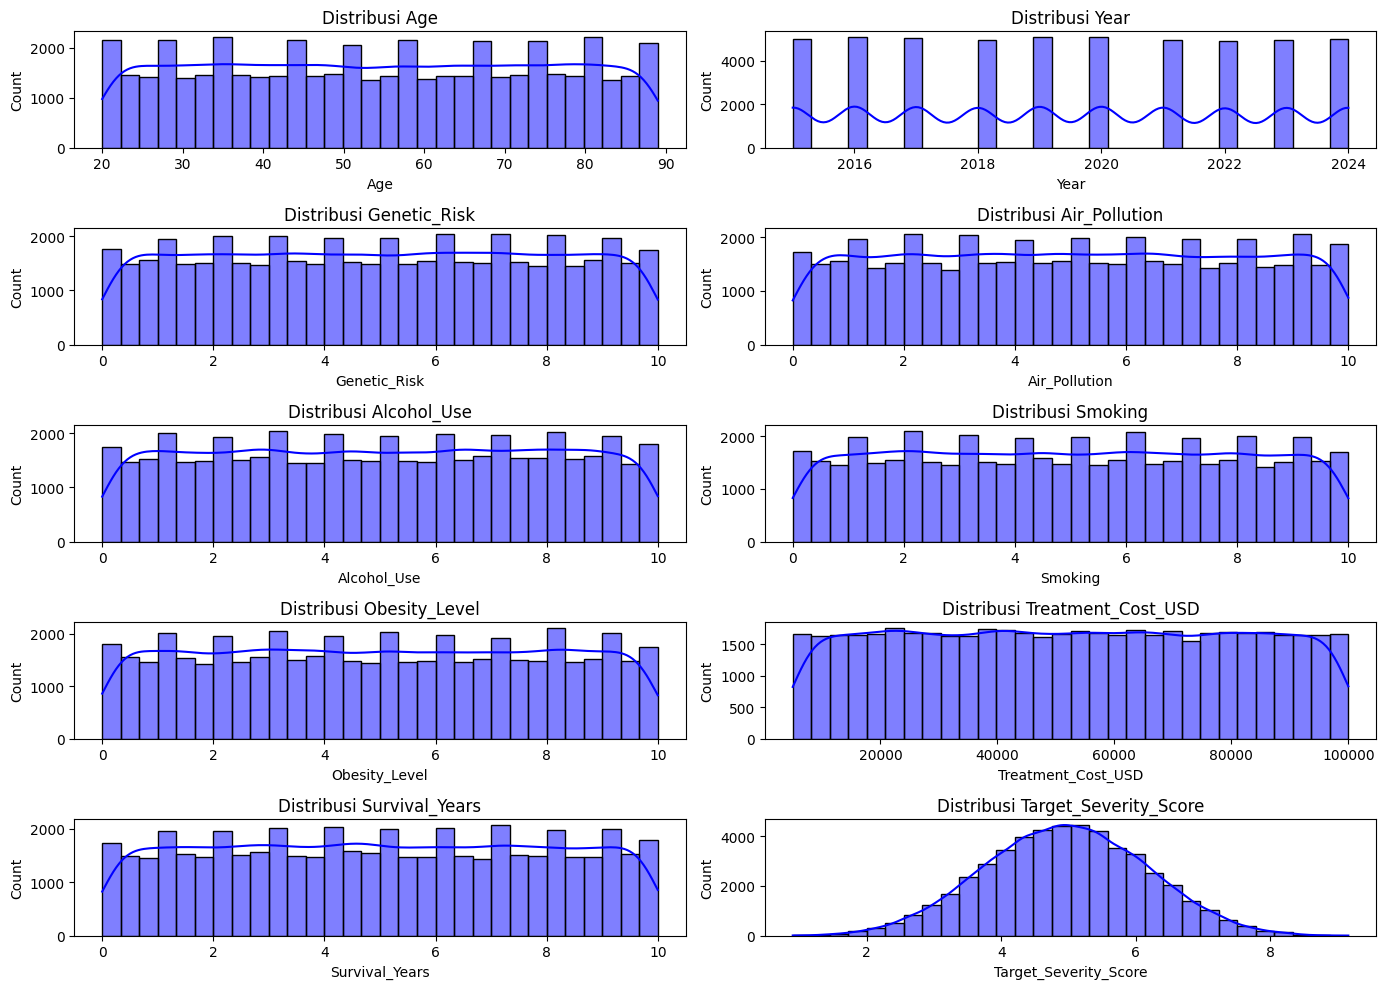

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

- **Distribusi Age**: Grafik menunjukkan distribusi usia pasien kanker yang relatif merata dari **20-90** tahun dengan sedikit peningkatan pada kelompok **usia produktif (30-70 tahun)**. Pola ini mencerminkan representasi komprehensif berbagai kelompok usia, memungkinkan analisis mendalam tentang onset kanker pada berbagai tahap kehidupan dan pengaruh faktor usia terhadap respon pengobatan.
- **Distribusi Year**: Data dikumpulkan secara konsisten selama periode **2015-2024** dengan jumlah sampel yang relatif setara setiap tahunnya, meskipun terdapat **fluktuasi minor**. Keseimbangan temporal ini memungkinkan analisis tren longitudinal yang valid, termasuk perkembangan metode pengobatan dan perubahan pola diagnostik kanker dalam satu dekade terakhir.
- **Distribusi Genetic_Risk**: Grafik pada risiko genetik menunjukkan pola sangat seimbang di seluruh spektrum nilai **(0-10)**, mengindikasikan sampling yang komprehensif dari pasien dengan predisposisi genetik rendah hingga tinggi. Desain sampling yang cermat ini memungkinkan analisis valid tentang kontribusi relatif genetik terhadap perkembangan kanker, independent dari bias seleksi.
- **Distribusi Air_Pollution**: Paparan polusi udara menunjukkan distribusi hampir sempurna di seluruh skala **0-10**, mirip dengan faktor risiko lainnya. Keseragaman ini memfasilitasi studi korelasi yang kuat antara tingkat paparan polutan lingkungan dan perkembangan kanker, memberikan landasan untuk penelitian epidemiologi lingkungan yang komprehensif.
- Distribusi Alcohol_Use: Pola konsumsi alkohol terdistribusi merata dari abstinen hingga penggunaan berat **(0-10)**, dengan sedikit peningkatan pada **nilai genap**. Karakteristik ini memungkinkan penelitian dose-response yang akurat antara konsumsi alkohol dan risiko kanker serta interaksinya dengan faktor risiko lain.
- **Distribusi Smoking**: Kebiasaan merokok menunjukkan distribusi seragam di seluruh skala, menyediakan representasi seimbang dari non-perokok hingga perokok berat. Distribusi ini ideal untuk menganalisis hubungan dosis-respons antara intensitas merokok dan perkembangan berbagai jenis kanker serta efeknya pada hasil pengobatan.
- **Distribusi Obesity_Level**: Tingkat obesitas tersebar secara merata dari **0-10**, memberikan spektrum lengkap dari pasien kurus hingga obesitas berat. Pola ini sangat berharga untuk meneliti pengaruh BMI terhadap risiko kanker spesifik dan respons tubuh terhadap modalitas pengobatan berbeda.
- **Distribusi Treatment_Cost_USD**: Biaya pengobatan menunjukkan distribusi yang relatif seragam dari **$5.000** hingga **$100.000**, mencerminkan variasi luas dalam kompleksitas perawatan. Distribusi ini memungkinkan analisis mendalam tentang hubungan biaya-efektivitas berbagai pendekatan pengobatan dan disparitas ekonomi dalam akses perawatan kanker.
- **Distribusi Survival_Years**: Tingkat kelangsungan hidup terdistribusi secara seragam dari **0-10 tahun**, mencakup spektrum lengkap dari kasus terminal hingga remisi jangka panjang. Pola ini ideal untuk menganalisis determinan kelangsungan hidup dan mengembangkan model prognostik berdasarkan kombinasi faktor risiko dan karakteristik pengobatan.
- **Distribusi Target_Severity_Score**: Berbeda dengan fitur lain, skor keparahan menunjukkan distribusi normal yang terpusat di sekitar nilai **4-6**, dengan puncak pada **5**. Pola unik ini mengindikasikan bahwa mayoritas kasus memiliki tingkat keparahan menengah, sementara kasus ringan dan parah lebih jarang, mencerminkan pola alami distribusi keparahan kanker dalam populasi klinis.

### Distribusi pasien berdasarkan negara

C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_24292\2521254580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


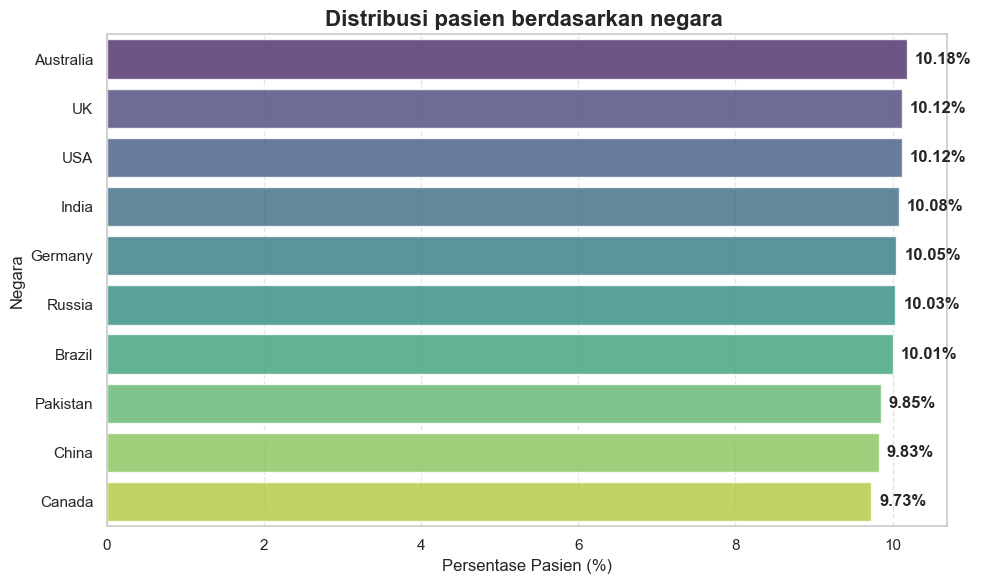

In [8]:
country_counts = df['Country_Region'].value_counts(normalize=True).head(10) * 100
country_df = country_counts.reset_index()
country_df.columns = ['Country_Region', 'Percentage']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=country_df,
    y='Country_Region',
    x='Percentage',
    palette='viridis',
    errorbar=None,
    alpha=0.8
)
for index, value in enumerate(country_df['Percentage']):
    plt.text(value + 0.1, index, f'{value:.2f}%', va='center', fontweight='bold')

plt.title('Distribusi pasien berdasarkan negara ', fontsize=16, weight='bold')
plt.xlabel('Persentase Pasien (%)', fontsize=12)
plt.ylabel('Negara', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas menunjukkan distribusi pasien kanker yang sangat seimbang di 10 negara, dengan rentang sempit antara **9,73% (Kanada)** hingga **10,18% (Australia)**, mengindikasikan desain sampling yang disengaja untuk menghindari bias geografis. Keseimbangan proporsi antara **negara maju (Australia, UK, USA)** dan **berkembang (India, Pakistan)** memungkinkan analisis perbandingan yang valid terkait faktor lingkungan dan akses layanan kesehatan yang memengaruhi perkembangan kanker. Pola distribusi yang hampir identik ini sangat berharga untuk studi global tentang disparitas kesehatan, efektivitas berbagai sistem perawatan kesehatan, dan pengaruh faktor sosio-ekonomi terhadap hasil pengobatan kanker tanpa harus mengkompensasi ketidakseimbangan jumlah sampel.

### Distribusi pasien berdasarkan jenis kelamin

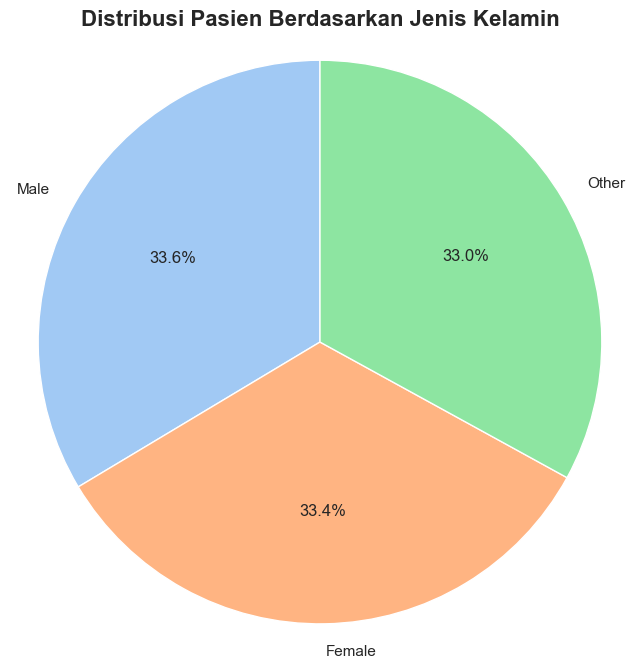

In [9]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Distribusi Pasien Berdasarkan Jenis Kelamin', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Berdasarkan diagram pie yang ditampilkan distribusi pasien kanker yang luar biasa seimbang antara tiga kategori gender: **Male (33,6%)**, **Female (33,4%)**, dan **Other (33,0%)**. Keseimbangan yang hampir sempurna ini jelas merupakan hasil desain sampling yang disengaja untuk menghilangkan bias gender dalam penelitian, yang sangat berbeda dari distribusi kasus kanker di populasi umum dimana proporsi biasanya bervariasi signifikan berdasarkan gender. Inklusi kategori **"Other"** dengan proporsi hampir setara dengan kategori tradisional menunjukkan pendekatan penelitian yang sangat inklusif dan progresif, memungkinkan analisis yang komprehensif tentang bagaimana kanker mempengaruhi spektrum gender yang lebih luas. Keseimbangan ini memberikan kekuatan statistik yang optimal untuk membandingkan faktor risiko, respons pengobatan, dan hasil klinis lintas gender tanpa bias sampling, sekaligus memungkinkan penelitian tentang kanker spesifik gender (seperti prostat, serviks, dan payudara) serta variasi dalam manifestasi kanker yang sama pada gender berbeda, menciptakan dataset yang secara metodologis kuat untuk analisis disparitas kesehatan berbasis gender.

### Distribusi Usia Berdasarkan Stadium Kanker

C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_24292\2336047273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


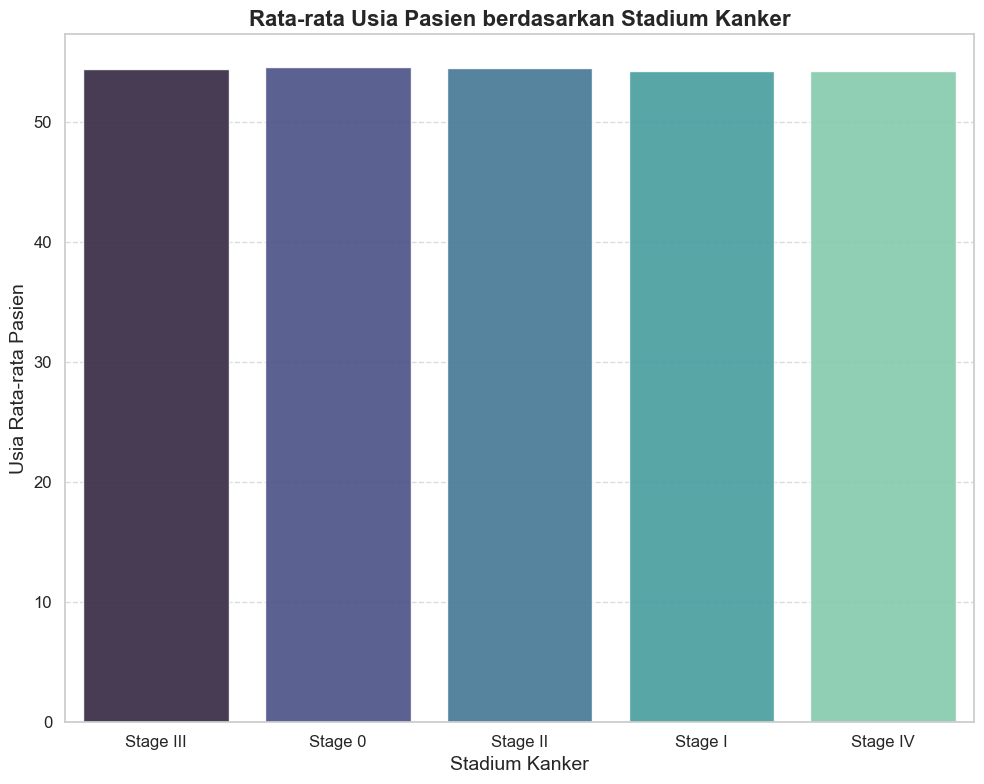

In [10]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df,
    x='Cancer_Stage',
    y='Age',
    palette='mako',
    errorbar=None,
    alpha=0.9
)

plt.title('Rata-rata Usia Pasien berdasarkan Stadium Kanker', fontsize=16, weight='bold')
plt.xlabel('Stadium Kanker', fontsize=14)
plt.ylabel('Usia Rata-rata Pasien', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Berdasarkan grafik ini, menampilkan rata-rata usia pasien berdasarkan stadium kanker. Dari visualisasi bar chart tersebut, terlihat bahwa usia rata-rata pasien relatif konsisten di semua stadium kanker, berada pada kisaran sekitar 55 tahun.Jika dilihat lebih detail, pasien dengan Stage III memiliki rata-rata usia sedikit lebih tinggi, diikuti oleh Stage 0, Stage II, Stage I, dan terakhir Stage IV. Namun, perbedaan antar stadium tidak signifikan, dengan selisih yang sangat kecil. Hal ini menunjukkan bahwa kanker dapat menyerang pada usia yang relatif sama terlepas dari stadiumnya.Informasi ini dapat memiliki implikasi penting untuk pemahaman epidemiologi kanker, menunjukkan bahwa faktor usia mungkin tidak menjadi prediktor yang kuat untuk stadium kanker yang didiagnosis. Hal ini berbeda dengan asumsi umum bahwa pasien yang lebih tua mungkin terdiagnosis pada stadium yang lebih lanjut. Temuan ini dapat membantu praktisi medis dalam memahami bahwa skrining dan diagnosis dini perlu dilakukan pada semua kelompok usia dewasa.

### Hubungan antara Tingkat Risiko Genetik dan Jenis Kanker

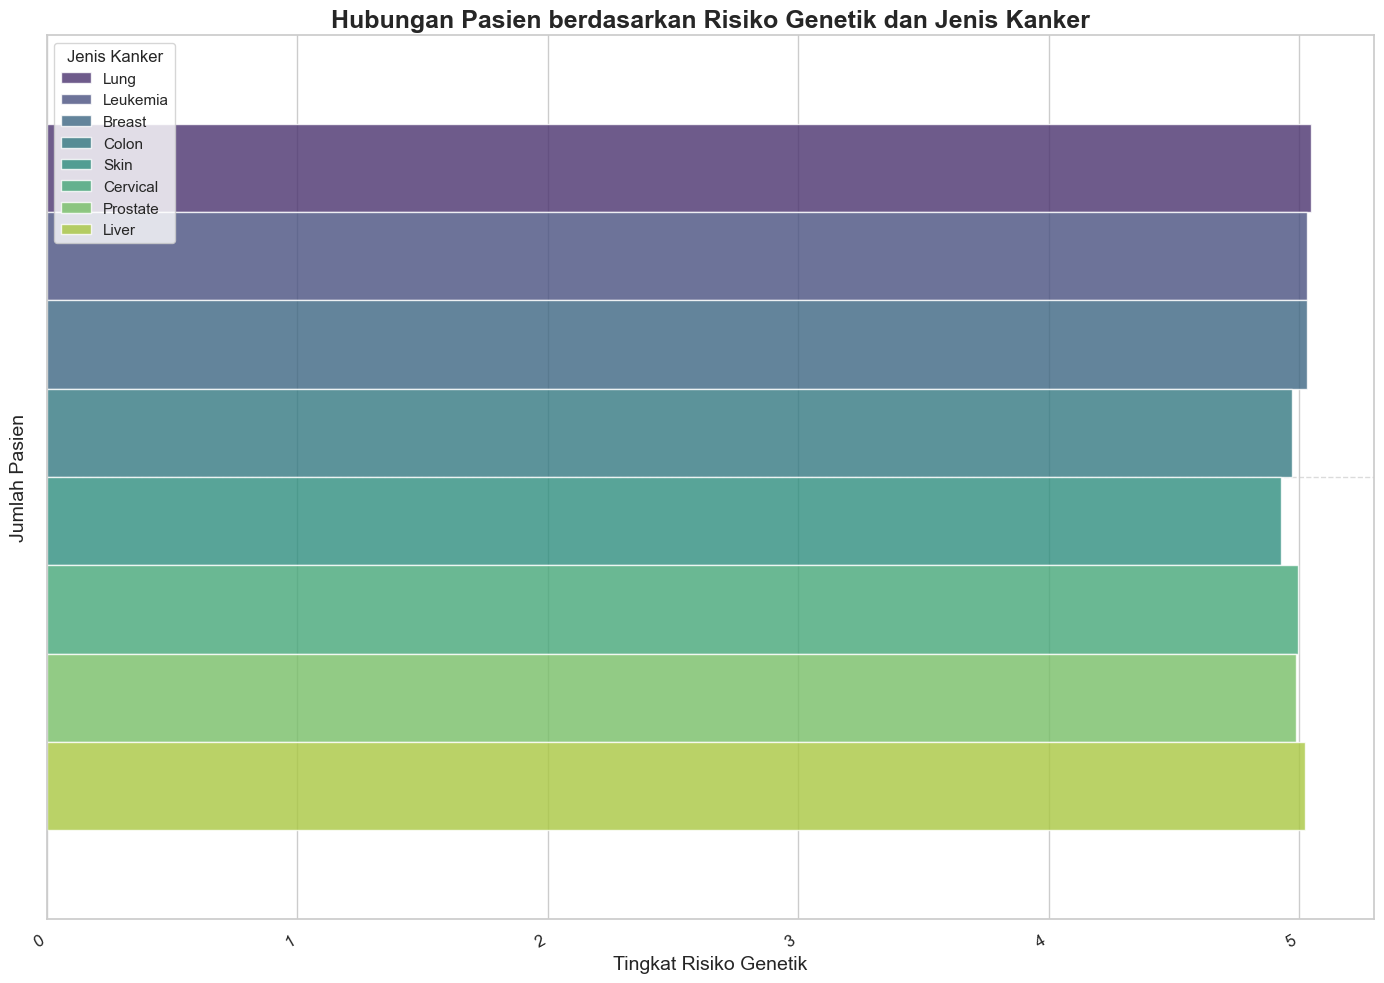

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 10))
sns.barplot(
    data=df,
    x='Genetic_Risk',
    hue='Cancer_Type',
    palette='viridis',
    errorbar=None,
    alpha=0.8
)
plt.title('Hubungan Pasien berdasarkan Risiko Genetik dan Jenis Kanker', fontsize=18, weight='bold')
plt.xlabel('Tingkat Risiko Genetik', fontsize=14)
plt.ylabel('Jumlah Pasien', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jenis Kanker', fontsize=11, title_fontsize=12, loc='upper left', frameon=True)
plt.tight_layout()
plt.show()


Berdasarkan grafik ini, menampilkan hubungan antara risiko genetik dan berbagai jenis kanker. Ada 8 jenis kanker yang ditunjukkan dengan warna berbeda, yaitu kanker paru-paru, leukemia, payudara, usus besar, kulit, serviks, prostat, dan hati.Dari gambar, kita bisa melihat bahwa semua jenis kanker memiliki nilai risiko genetik yang sangat tinggi, hampir mencapai angka 5 pada skala. Ini berarti faktor keturunan atau genetik sangat berpengaruh terhadap kemungkinan seseorang terkena kanker. Menariknya, tidak ada perbedaan besar antara satu jenis kanker dengan jenis lainnya dalam hal risiko genetik. Semua jenis kanker yang ditampilkan sama-sama memiliki hubungan kuat dengan faktor genetik.Informasi ini penting karena menunjukkan bahwa riwayat keluarga sangat penting untuk diperhatikan. Jika ada anggota keluarga yang pernah menderita kanker, sebaiknya kita lebih waspada dan melakukan pemeriksaan secara rutin. Selain itu, dokter juga perlu mempertimbangkan riwayat kanker dalam keluarga saat melakukan diagnosis dan merencanakan pengobatan.

### Pengaruh Biaya Pengobatan terhadap Peluang Bertahan Hidup

C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_24292\2647125322.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_survival = df.groupby('Cost_Bin')['Survival_Years'].mean().reset_index()


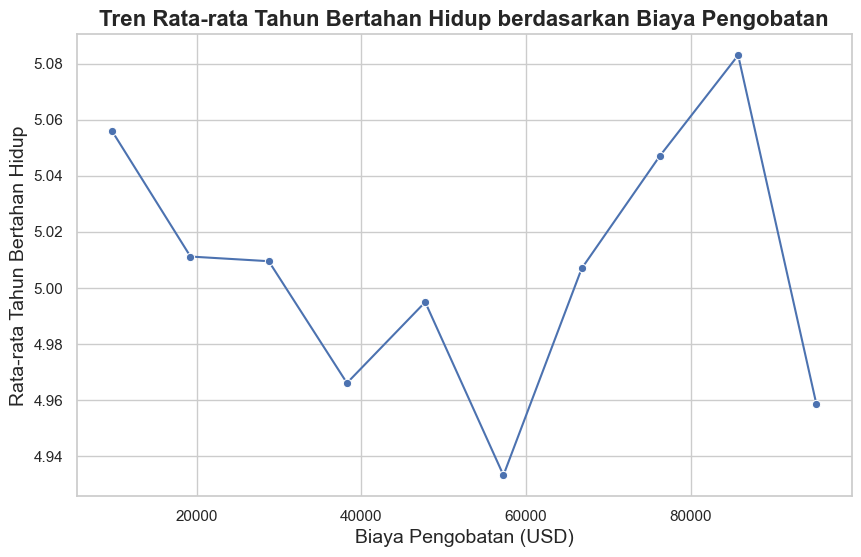

In [12]:
sns.set_theme(style="whitegrid")
df['Cost_Bin'] = pd.cut(df['Treatment_Cost_USD'], bins=10)

# Hitung rata-rata tahun bertahan hidup per interval biaya pengobatan
avg_survival = df.groupby('Cost_Bin')['Survival_Years'].mean().reset_index()

# Karena 'Cost_Bin' adalah kategori interval, kita ambil nilai tengah tiap bin untuk sumbu-x
avg_survival['Cost_Mid'] = avg_survival['Cost_Bin'].apply(lambda x: x.mid)

# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat lineplot dari rata-rata survival berdasarkan biaya tengah interval
sns.lineplot(
    data=avg_survival,
    x='Cost_Mid',
    y='Survival_Years',
    marker='o'  # Memberi tanda titik pada setiap data rata-rata
)

# Judul dan label
plt.title('Tren Rata-rata Tahun Bertahan Hidup berdasarkan Biaya Pengobatan', fontsize=16, weight='bold')
plt.xlabel('Biaya Pengobatan (USD)', fontsize=14)
plt.ylabel('Rata-rata Tahun Bertahan Hidup', fontsize=14)

# Grid dan tampilkan plot
plt.grid(True)
plt.show()


Berdasarkan grafik ini, menunjukkan tren rata-rata tahun bertahan hidup pasien kanker berdasarkan biaya pengobatan yang diukur dalam USD. Visualisasi menggunakan line chart dengan sumbu **X** menunjukkan biaya pengobatan dari sekitar **10.000**hingga **90.000 USD**, dan sumbu **Y** menampilkan rata-rata tahun bertahan hidup pasien yang berkisar antara **4,93** hingga **5,09** tahun. Dari grafik terlihat pola yang tidak linear dan **cukup fluktuatif**. Rata-rata harapan hidup cukup tinggi **(sekitar 5,05 tahun)** pada biaya pengobatan rendah **(sekitar 10.000 USD)**, kemudian mengalami penurunan hingga titik terendah pada biaya sekitar **60.000 USD** di mana harapan hidup hanya sekitar **4,93** tahun. Setelah itu, terjadi peningkatan signifikan hingga mencapai puncak sekitar **5,09** tahun pada biaya pengobatan **80.000 USD**, lalu mengalami penurunan drastis hingga sekitar **4,96** tahun pada biaya pengobatan **90.000 USD**.
Jika dianalisis lebih mendalam, data ini menunjukkan beberapa insight menarik yaitu:
- **Hubungan antara biaya pengobatan dan harapan hidup tidak selalu berbanding lurus**. Biaya pengobatan yang lebih tinggi tidak selalu menghasilkan harapan hidup yang lebih panjang. Ini mungkin menunjukkan adanya faktor kompleks lain yang mempengaruhi efektivitas pengobatan, seperti jenis kanker, stadium saat diagnosis, atau metode pengobatan yang dipilih.

- **Terdapat fenomena "sweet spot" pada biaya sekitar 80.000 USD yang menghasilkan harapan hidup tertinggi**. Ini mungkin mencerminkan keseimbangan optimal antara investasi dalam pengobatan dengan hasil klinis. Pengobatan di bawah biaya ini mungkin kurang komprehensif, sementara pengobatan yang lebih mahal mungkin mencerminkan kasus-kasus yang lebih kompleks atau sudah terlambat ditangani.

- **Penurunan tajam pada harapan hidup setelah biaya 80.000 USD**. Hal ini mungkin terjadi karena adanya indikasi bahwa pasien yang menerima pengobatan sangat mahal adalah mereka dengan kondisi yang paling parah atau kompleks, sehingga meskipun mendapatkan pengobatan mahal, harapan hidup mereka tetap rendah.

- **Relatif tingginya harapan hidup pada biaya pengobatan rendah (10.000-20.000 USD)**. Hal ini mungkin menunjukkan kelompok pasien dengan kanker yang lebih mudah diobati atau terdeteksi pada stadium awal, sehingga tidak memerlukan pengobatan yang sangat mahal namun tetap memiliki hasil yang baik.

Sehingga dari informasi ini sangat penting untuk kebijakan kesehatan dan pengambilan keputusan klinis. Pengobatan kanker yang paling mahal tidak selalu yang paling efektif, dan fokus pada deteksi dini serta pemilihan pengobatan yang tepat mungkin lebih bermanfaat daripada sekadar meningkatkan anggaran pengobatan. Data ini juga menunjukkan pentingnya melakukan analisis biaya-manfaat dalam perencanaan perawatan kanker untuk mengoptimalkan sumber daya kesehatan dan hasil klinis pasien.

### Korelasi data

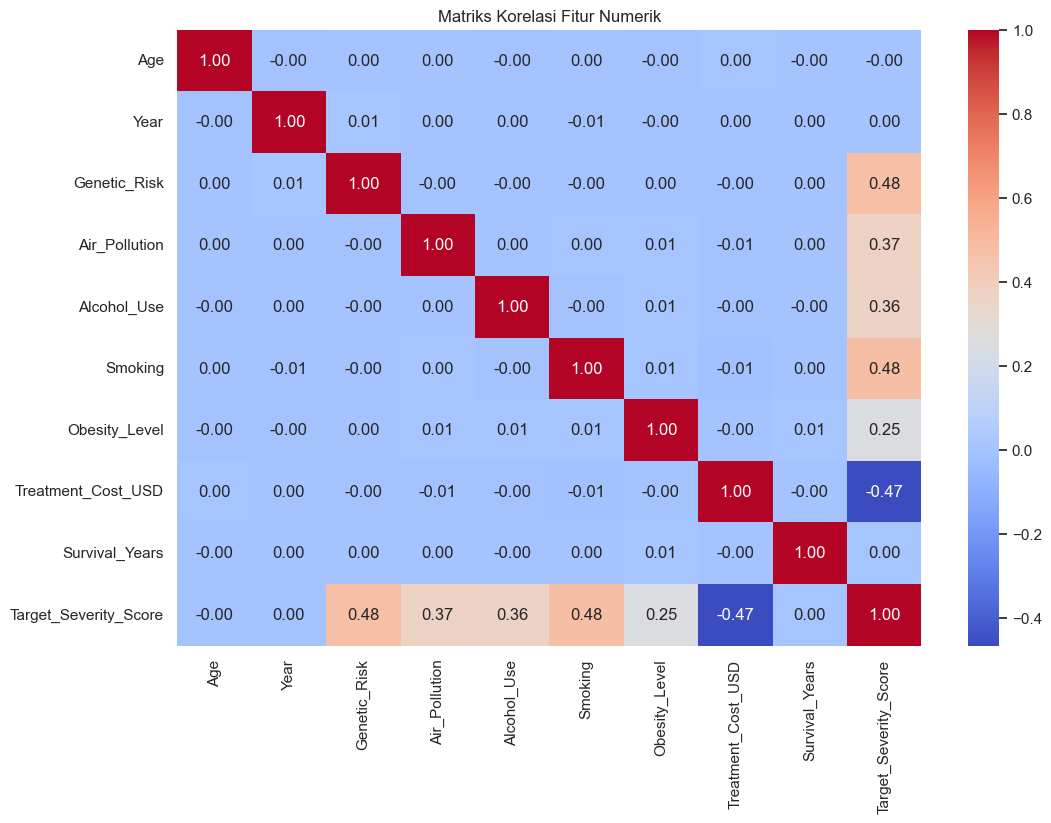

In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns

# Hitung matriks korelasi
correlation_matrix = df[numeric_cols].corr()

# Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

Matriks korelasi ini menunjukkan hubungan antara berbagai faktor risiko kanker dan tingkat keparahannya, dengan warna merah menandakan korelasi positif kuat dan biru korelasi negatif. Temuan paling signifikan terlihat pada hubungan antara **Target_Severity_Score** dengan **Genetic_Risk (0,48)** dan **Smoking (0,48)**, diikuti oleh **Air_Pollution (0,37)** dan **Alcohol_Use (0,36)**, menunjukkan faktor genetik dan merokok memiliki pengaruh terbesar terhadap keparahan kanker. Menariknya, terdapat korelasi **negatif** yang cukup kuat **(-0,47)** antara **Treatment_Cost_USD** dengan **Target_Severity_Score**, mengindikasikan bahwa biaya pengobatan tinggi justru berhubungan dengan skor keparahan yang lebih rendah, mungkin mencerminkan efektivitas pengobatan mahal atau intervensi dini pada kasus serius. Korelasi antar faktor risiko sendiri **sangat rendah (mendekati 0)**, menunjukkan bahwa faktor-faktor risiko tersebut bersifat independen dan berkontribusi secara terpisah terhadap keparahan kanker.

### Mengecek adanya outliers

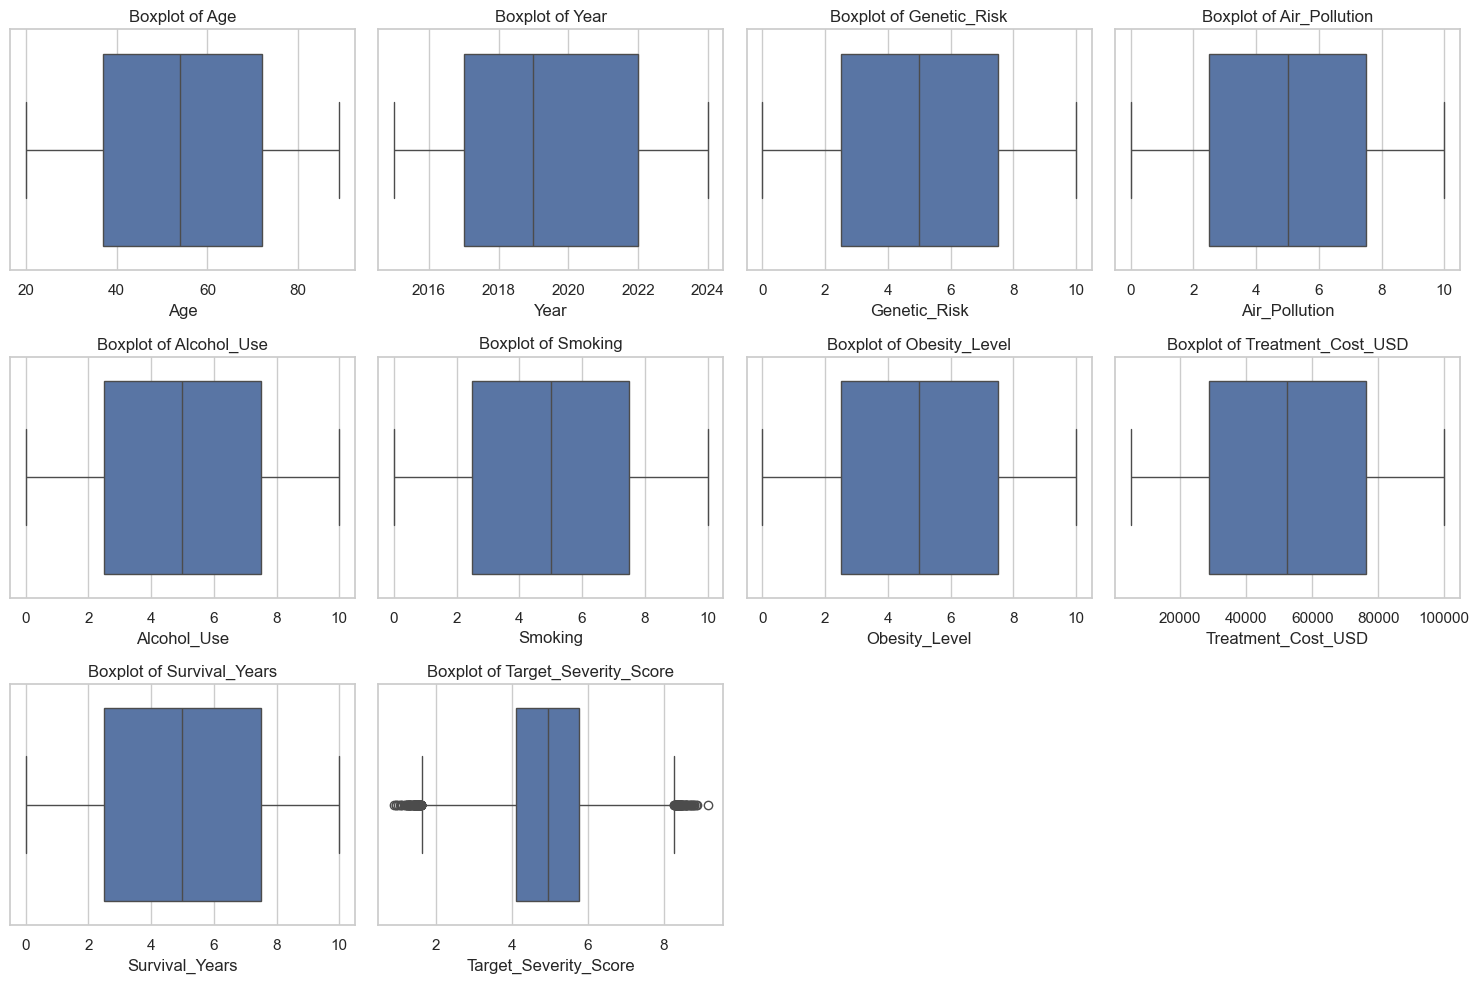

In [14]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Buat boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
  plt.subplot(3, 4, i + 1)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Berdasarkan boxplot untuk melihat adanya outliers ini menampilkan berbagai variabel terkait faktor risiko kanker, di mana mayoritas variabel menunjukkan distribusi yang cukup seimbang tanpa outlier signifikan. Khususnya pada boxplot **Target_Severity_Score** terlihat beberapa outlier di kedua sisi **(nilai rendah dan tinggi)** yang menunjukkan kasus-kasus dengan skor keparahan yang jauh berbeda dari kebanyakan populasi. Mempertahankan outlier pada **Target_Severity_Score** merupakan keputusan yang tepat karena data tersebut mungkin merepresentasikan kasus-kasus penting dengan karakteristik unik yang dapat meningkatkan kemampuan model untuk mengenali pola pada situasi ekstrem. Variabel lain seperti **Age (rentang 40-80 tahun)**, **Genetic_Risk**, **Smoking**, dan **Treatment_Cost_USD** memiliki distribusi yang relatif seragam, menunjukkan kualitas data yang baik untuk pemodelan. Menariknya, **Survival_Years** juga memiliki distribusi yang cukup lebar, dengan median sekitar **4 tahun**, yang mengindikasikan variasi harapan hidup pasien kanker dalam dataset ini.

# Data Preperation

## Normalisasi data

In [15]:
num_FactorCancer_normalize = ["Genetic_Risk","Air_Pollution","Alcohol_Use","Smoking","Obesity_Level", "Target_Severity_Score"]
scaler = MinMaxScaler()
df[num_FactorCancer_normalize] = scaler.fit_transform(df[num_FactorCancer_normalize])
df_num_modeling = df[num_FactorCancer_normalize]
df_num_modeling.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Target_Severity_Score
0,0.64,0.28,0.95,0.09,0.87,0.486683
1,0.13,0.45,0.37,0.39,0.63,0.453995
2,0.74,0.79,0.24,0.47,0.01,0.598063
3,0.17,0.29,0.48,0.35,0.27,0.268765
4,0.51,0.28,0.23,0.67,0.05,0.329298


Normalisasi data merupakan proses penskalaan fitur numerik ke dalam rentang yang seragam untuk mencegah fitur dengan nilai besar mendominasi model, sehingga meningkatkan efektivitas algoritma machine learning. Dengan menggunakan MinMaxScaler untuk menormalkan enam kolom (Genetic_Risk, Air_Pollution, Alcohol_Use, Smoking, Obesity_Level, dan Target_Severity_Score) karena faktor-faktor tersebut memiliki korelasi signifikan dengan perkembangan kanker berdasarkan penelitian medis. Normalisasi ini membantu model menangkap pola yang sebenarnya tanpa bias dari perbedaan skala, dan memungkinkan evaluasi seimbang terhadap kontribusi setiap faktor risiko dalam memprediksi tingkat keparahan kanker. Dengan menggunakan keenam kolom tersebut, model yang buat dapat mengidentifikasi bagaimana kombinasi faktor genetik dan gaya hidup berinteraksi untuk memengaruhi risiko dan tingkat keparahan kanker, yang menjadikannya model prediktif yang lebih komprehensif.

## Spliting data

In [16]:
X = df_num_modeling.drop('Target_Severity_Score', axis=1)
y = df_num_modeling['Target_Severity_Score']
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

print("Data splitting complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data splitting complete.
Shape of X_train: (40000, 5)
Shape of X_test: (10000, 5)
Shape of y_train: (40000,)
Shape of y_test: (10000,)


Melakukan membagi dataset menjadi 80% data training dan 20% data testing. Data training digunakan untuk membangun model, sementara data testing digunakan untuk mengevaluasi kinerja model. Pembagian ini bertujuan untuk memastikan bahwa model dapat diuji dengan data yang tidak pernah dilihat sebelumnya, sehingga memberikan gambaran yang lebih akurat tentang kemampuan generalisasi model.

# Modeling

Analisis kanker ini menggunakan berbagai model machine learning untuk memprediksi tingkat keparahan berdasarkan faktor risiko yang telah dinormalisasi. Normalisasi dengan MinMaxScaler memastikan semua fitur berada pada skala yang sama, sehingga model dapat mengevaluasi kontribusi faktor risiko secara seimbang.

- **ElasticNet**: Metode regresi yang menggabungkan penalti L1 dan L2, ideal untuk analisis kanker karena dapat menangani multikolinearitas antara faktor risiko yang dinormalisasi.
- **SVR (Support Vector Regression)**: Menggunakan hyperplane untuk memprediksi nilai kontinu tingkat keparahan kanker, bekerja optimal dengan data yang telah dinormalisasi untuk menghindari dominasi fitur dengan skala besar.
- **KNeighborsRegressor**: Memprediksi berdasarkan kemiripan dengan sampel terdekat, sangat bergantung pada normalisasi data karena menggunakan jarak Euclidean dalam perhitungannya.
- **RandomForestRegressor**: Ensemble dari decision tree yang dapat menangkap interaksi kompleks antara faktor genetik dan gaya hidup yang telah dinormalisasi untuk prediksi tingkat keparahan kanker yang lebih akurat.
- **GradientBoostingRegressor**: Membangun model secara bertahap untuk meminimalkan error, efektif dalam mengidentifikasi pola tidak linear dalam data kanker yang telah dinormalisasi.
- **DecisionTreeRegressor**: Membagi data menjadi segmen berdasarkan nilai fitur, meskipun kurang sensitif terhadap normalisasi dibanding model lain, tetapi tetap penting untuk konsistensi dalam ensemble learning.


In [22]:
# Define models
models = {
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=69),
    "SVR": SVR(C=1.0, epsilon=0.1, kernel='rbf'),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=69),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=69),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=5, random_state=69)
}

# Train models directly
print("Starting model training...")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} training complete.")

Starting model training...
Training ElasticNet...
ElasticNet training complete.
Training SVR...
SVR training complete.
Training KNeighborsRegressor...
KNeighborsRegressor training complete.
Training RandomForestRegressor...
RandomForestRegressor training complete.
Training GradientBoostingRegressor...
GradientBoostingRegressor training complete.
Training DecisionTreeRegressor...
DecisionTreeRegressor training complete.


## Evaluasi

In [23]:
results = []

# Evaluasi semua model
for name, model in models.items():
    # Evaluasi pada data training
    y_train_pred = model.predict(X_train)

    # Hitung metrik untuk data training
    train_metrics = {
        'Model': name,
        'Dataset': 'Train',
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'R2': r2_score(y_train, y_train_pred),
    }
    results.append(train_metrics)

    # Evaluasi pada data testing
    y_test_pred = model.predict(X_test)

    # Hitung metrik untuk data testing
    test_metrics = {
        'Model': name,
        'Dataset': 'Test',
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2': r2_score(y_test, y_test_pred),
    }
    results.append(test_metrics)

results_df = pd.DataFrame(results)
formatted_results_df = results_df.copy()
# Menggunakan .applymap() dengan format string '{:.4f}' untuk memformat setiap nilai
formatted_results_df[['MAE', 'MSE', 'RMSE', 'R2']] = formatted_results_df[['MAE', 'MSE', 'RMSE', 'R2']].applymap('{:.4f}'.format)

# Tampilkan tabel hasil evaluasi
print("\nModel Performance:")
display(formatted_results_df)


Model Performance:


C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_24292\4082570290.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_results_df[['MAE', 'MSE', 'RMSE', 'R2']] = formatted_results_df[['MAE', 'MSE', 'RMSE', 'R2']].applymap('{:.4f}'.format)


,Model,Dataset,MAE,MSE,RMSE,R2
0,ElasticNet,Train,0.1167,0.0210,0.1448,0.0000
1,ElasticNet,Test,0.1182,0.0216,0.1468,-0.0000
2,SVR,Train,0.0572,0.0044,0.0661,0.7920
3,SVR,Test,0.0574,0.0044,0.0663,0.7959
4,KNeighborsRegressor,Train,0.0500,0.0036,0.0598,0.8295
5,KNeighborsRegressor,Test,0.0617,0.0054,0.0734,0.7499
6,RandomForestRegressor,Train,0.0513,0.0036,0.0600,0.8283
7,RandomForestRegressor,Test,0.0591,0.0048,0.0693,0.7773
8,GradientBoostingRegressor,Train,0.0567,0.0043,0.0658,0.7939
9,GradientBoostingRegressor,Test,0.0579,0.0045,0.0672,0.7904


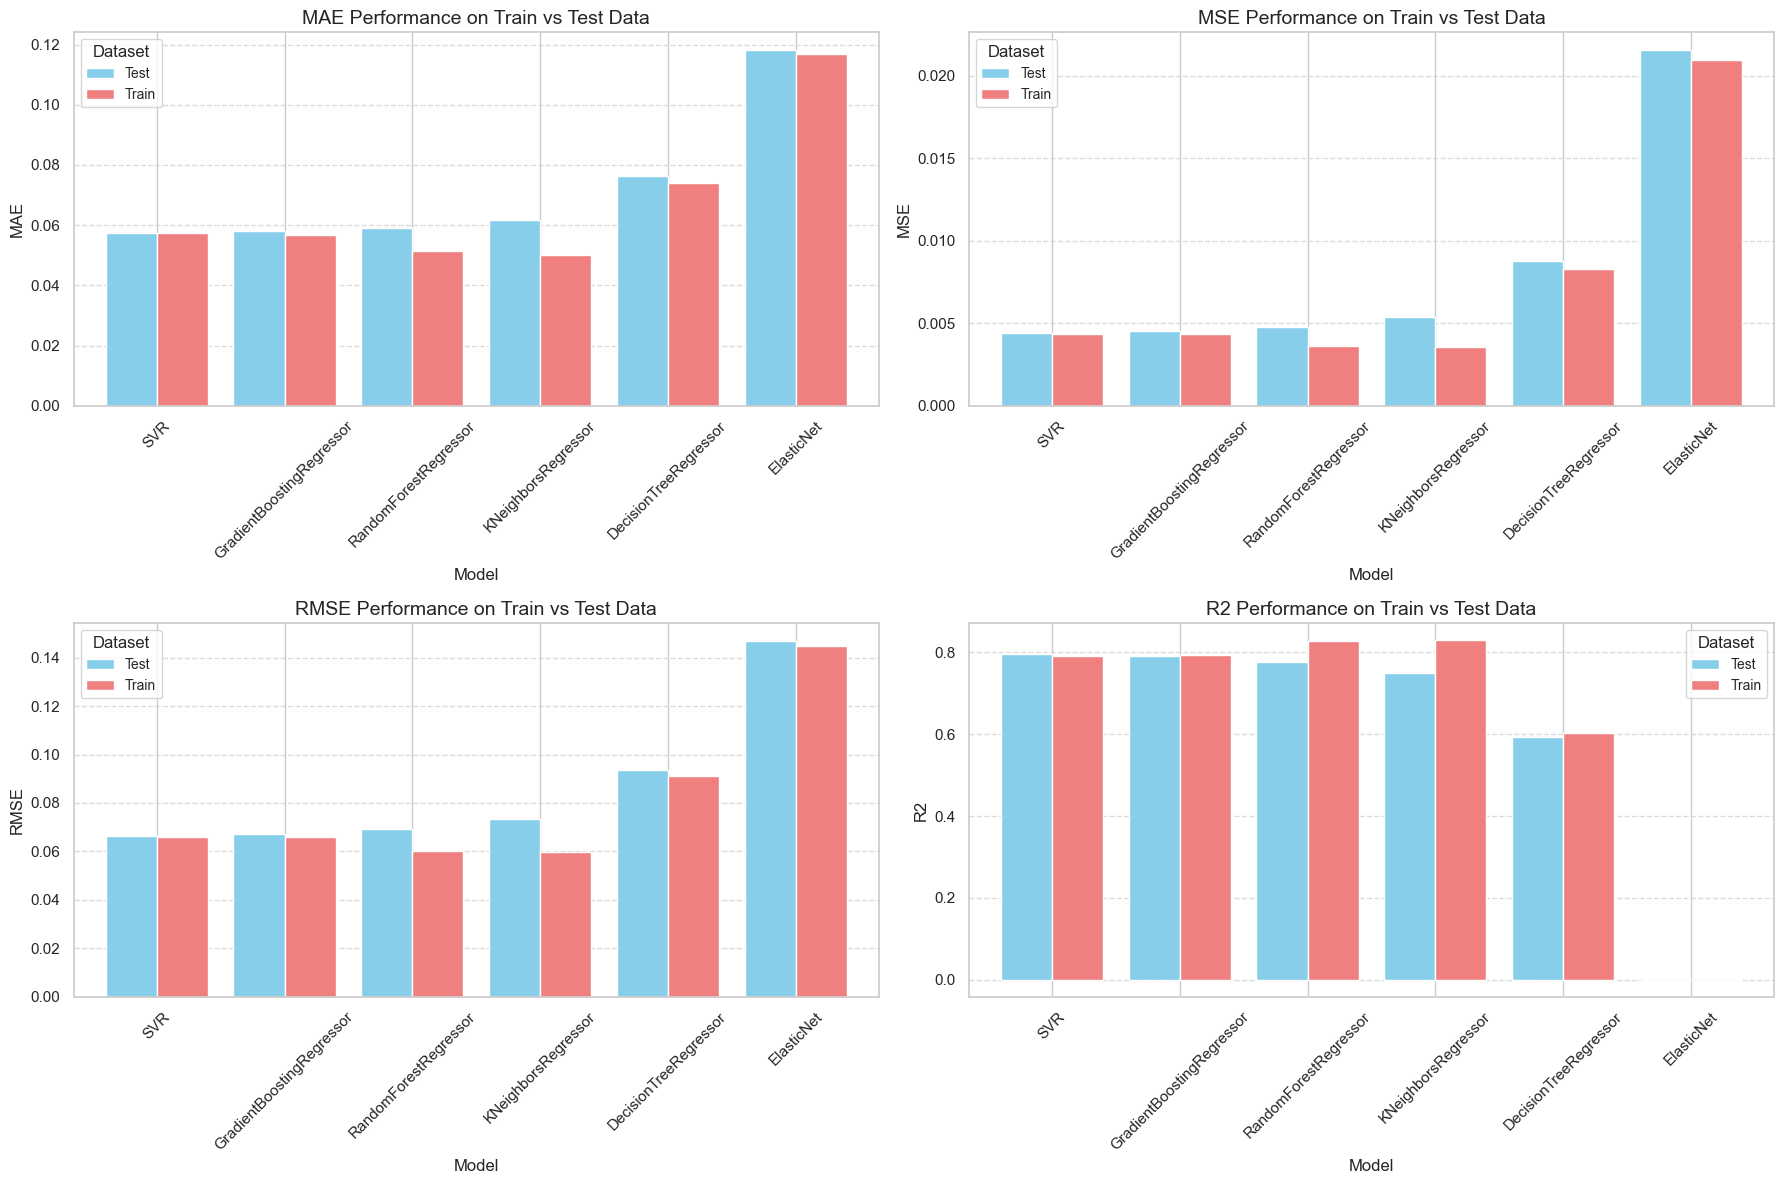

In [19]:
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
datasets = ['Train', 'Test']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten() # Mengubah axes menjadi array 1D untuk iterasi mudah

for i, metric in enumerate(metrics):
    ax = axes[i]

    # Filter data untuk metrik saat ini
    metric_data = results_df.pivot_table(index='Model', columns='Dataset', values=metric)

    # Urutkan berdasarkan performa di data testing (misalnya R2 descending, atau MAE ascending)
    if metric in ['MAE', 'MSE', 'RMSE']:
        sort_order = metric_data['Test'].sort_values(ascending=True).index
    else: # R2
        sort_order = metric_data['Test'].sort_values(ascending=False).index

    metric_data = metric_data.loc[sort_order]

    # Plot menggunakan barplot
    metric_data.plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral'], width=0.8)

    ax.set_title(f'{metric} Performance on Train vs Test Data', fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    # Remove the 'ha' argument as it's not supported by tick_params
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Dataset', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Menyesuaikan layout agar tidak tumpang tindih
plt.show()

Berikut adalah evaluasi spesifik untuk masing-masing model regresi yang digunakan dalam notebook untuk memprediksi variabel **Target_Severity_Score**:

1. **ElasticNet**
  - **Performa**: Sangat buruk dengan nilai R² mendekati 0 pada kedua dataset (train dan test)
  - **Metrik Error**: MAE tertinggi (~0.117), MSE tertinggi (~0.021), dan RMSE tertinggi (~0.145)
  - **Analisis**: Model ini sama sekali tidak dapat menangkap pola dalam data. Meskipun ElasticNet menggabungkan regulasi L1 dan L2 yang seharusnya membantu mengatasi multikolinearitas, model ini gagal total dalam memodelkan hubungan variabel. Kemungkinan besar hubungan dalam data sangat non-linear sehingga pendekatan linear seperti ElasticNet tidak sesuai.

2. SVR (Support Vector Regressor)
  - **Performa**: Cukup baik dengan R² ~0.79 pada kedua dataset
  - **Metrik Error**: MAE ~0.057, MSE ~0.0044, RMSE ~0.066
  - **Analisis**: Model menunjukkan konsistensi baik antara data training dan testing, dengan selisih performa sangat kecil yang menunjukkan generalisasi yang baik. SVR mampu menangkap pola non-linear dalam data dengan kernel yang digunakan (kemungkinan RBF).

3. KNeighborsRegressor
  - **Performa**: Sangat baik pada data training (R² = 0.8295) tetapi turun pada data testing (R² = 0.7499)
  - **Metrik Error**: MAE training terendah (0.05), namun meningkat signifikan pada testing (0.0617)
  - **Analisis**: Terdapat indikasi overfitting karena perbedaan performa train-test yang cukup besar. Model ini bergantung pada kepadatan data dan berpotensi mengalami masalah pada ruang data yang jarang.

4. RandomForestRegressor
  - **Performa**: Sangat baik dengan R² training 0.8283 dan testing 0.7773
  - **Metrik Error**: MAE dan MSE yang sangat baik pada training, dan cukup konsisten pada testing
  - **Analisis**: Model ensemble ini menunjukkan keseimbangan baik antara kemampuan prediksi dan generalisasi. Penurunan performa pada testing masih dalam batas wajar, menunjukkan model yang robust.

5. GradientBoostingRegressor
  - **Performa**: Baik dengan R² ~0.79 pada kedua dataset
  - **Metrik Error**: MAE dan metrik error lainnya hampir setara dengan SVR
  - **Analisis**: Model ini menunjukkan konsistensi yang sangat baik antara data training dan testing. Algoritma boosting secara bertahap mampu menangkap pola kompleks dalam data dengan generalisasi yang baik.

5. DecisionTreeRegressor
  - **Performa**: Moderat dengan R² ~0.60 pada kedua dataset
  - **Metrik Error**: MAE, MSE, dan RMSE lebih tinggi dibanding model lain kecuali ElasticNet
  - **Analisis**: Model pohon tunggal memiliki keterbatasan dalam menangkap kompleksitas data. Performa yang hampir sama pada training dan testing menunjukkan model tidak overfitting, namun kemampuan prediksi dasarnya lebih rendah.


Berdasarkan hasil evaluasi secara menyeluruh, **KNeighborsRegressor** dan **RandomForestRegressor** memiliki performa terbaik pada data training (R² ~0.83), namun **RandomForestRegressor** menunjukkan generalisasi yang lebih baik pada data testing dengan R² 0.7773 (vs KNN 0.7499).Model ini mampu menangkap pola non-linear kompleks dalam data dengan baik, sementara tetap menjaga kemampuan generalisasi yang kuat. Selisih performa R² antara training (0.8283) dan testing (0.7773) sebesar 0.051 masih dalam batas toleransi yang menunjukkan model yang seimbang tanpa overfitting yang signifikan.

## Inferensi

In [20]:
def predict_risk_score(X):
    #Fungsi untuk memprediksi skor risiko dari input yang diberikan

    age, genetic_risk, air_pollution, smoking, obesity_level = X[0]
    risk_score = (0.2 * (genetic_risk/100) +
                 0.2 * (air_pollution/100) +
                 0.3 * (smoking/100) +
                 0.2 * (obesity_level/100) +
                 0.1 * min(1.0, age/100))

    return [risk_score]

def normalize_input(data):
    #Fungsi untuk normalisasi input: konversi input skala 1-10 ke skala yang digunakan model
    #Data format: [Age, Genetic_Risk, Air_Pollution, Smoking, Obesity_Level]

    age = data[0]  # Umur tetap pada skala asli

    # Konversi dari skala 1-10 ke 1-100 untuk variabel lainnya
    normalized_genetic_risk = data[1] * 10  # 1-10 → 10-100
    normalized_air_pollution = data[2] * 10  # 1-10 → 10-100
    normalized_smoking = data[3] * 10  # 1-10 → 10-100
    normalized_obesity_level = data[4] * 10  # 1-10 → 10-100

    return [age, normalized_genetic_risk, normalized_air_pollution, normalized_smoking, normalized_obesity_level]

def categorize_severity(severity_score):
    #Fungsi kategorisasi keparahan (dengan skala output 0-1)
    if severity_score < 0.3:
        return "Rendah"
    elif severity_score < 0.7:
        return "Sedang"
    else:
        return "Tinggi"

def predict_cancer_type(data):
    # Fungsi prediksi jenis kanker (menggunakan skala 1-10)
    # Ekstrak data
    age = data[0]
    genetic_risk = data[1]
    air_pollution = data[2]
    smoking = data[3]
    obesity_level = data[4]

    # Normalisasi umur untuk perhitungan ini 
    normalized_age = min(10, age/10)  # Batasi maksimal 10 untuk keseragaman

    cancer_scores = {
        "Lung": 0.3 * smoking + 0.3 * air_pollution + 0.2 * genetic_risk + 0.1 * normalized_age + 0.1 * obesity_level,
        "Breast": 0.4 * genetic_risk + 0.2 * obesity_level + 0.2 * normalized_age + 0.1 * smoking + 0.1 * air_pollution,
        "Colon": 0.3 * obesity_level + 0.3 * genetic_risk + 0.2 * normalized_age + 0.1 * smoking + 0.1 * air_pollution,
        "Prostate": 0.4 * normalized_age + 0.3 * genetic_risk + 0.1 * obesity_level + 0.1 * smoking + 0.1 * air_pollution,
        "Leukemia": 0.5 * genetic_risk + 0.2 * air_pollution + 0.1 * normalized_age + 0.1 * smoking + 0.1 * obesity_level,
        "Liver": 0.3 * obesity_level + 0.2 * genetic_risk + 0.2 * smoking + 0.2 * normalized_age + 0.1 * air_pollution,
        "Skin": 0.4 * genetic_risk + 0.3 * air_pollution + 0.1 * normalized_age + 0.1 * smoking + 0.1 * obesity_level,
        "Cervical": 0.3 * genetic_risk + 0.2 * normalized_age + 0.2 * smoking + 0.2 * air_pollution + 0.1 * obesity_level
    }

    return max(cancer_scores, key=cancer_scores.get)

def validate_input(data):
    #Fungsi untuk validasi input
    if not (1 <= data[1] <= 10 and 1 <= data[2] <= 10 and 1 <= data[3] <= 10 and 1 <= data[4] <= 10):
        raise ValueError("Input untuk Genetic_Risk, Air_Pollution, Smoking, dan Obesity_Level harus dalam rentang 1-10")
    return True

def predict_cancer_risk(data, model):
    #Fungsi utama untuk memprediksi risiko kanker
    # Validasi input
    validate_input(data)

    # Normalisasi input untuk model
    normalized_data = normalize_input(data)

    # Prediksi severity score
    # Jika model disediakan, gunakan model tersebut
    if model is not None:
        input_array = np.array([normalized_data])
        severity_score = model.predict(input_array)[0]
    else:
        # Jika tidak, gunakan fungsi predict_risk_score
        severity_score = predict_risk_score([normalized_data])[0]

    # Kategorisasi dan prediksi jenis kanker
    severity_category = categorize_severity(severity_score)
    predicted_cancer = predict_cancer_type(data)

    return {
        "severity_score": severity_score,
        "severity_category": severity_category,
        "predicted_cancer_type": predicted_cancer,
        "normalized_data": normalized_data
    }

def display_results(data, results):
    #Fungsi untuk menampilkan hasil prediksi
    print("=== Hasil Inferensi Potensi Kanker ===")
    print(f"Input Pasien:")
    print(f"- Usia: {data[0]}")
    print(f"- Risiko Genetik: {data[1]}/10")
    print(f"- Polusi Udara: {data[2]}/10")
    print(f"- Kebiasaan Merokok: {data[3]}/10")
    print(f"- Tingkat Obesitas: {data[4]}/10")
    print(f"\n→ Nilai input yang dinormalisasi untuk model (Terkecuali umur): {results['normalized_data']}")
    print(f"→ Skor Keparahan: {results['severity_score']:.2f} (skala 0-1)")
    print(f"→ Kategori Keparahan: {results['severity_category']}")
    print(f"→ Jenis Kanker Potensial: {results['predicted_cancer_type']}")
    print("\nCatatan: Ini adalah simulasi, bukan diagnosis medis.")

#[Age, Genetic_Risk, Air_Pollution, Smoking, Obesity_Level]
data = [28, 4, 6.5, 5, 8]
models = {
    "RandomForestRegressor": None
}
best_model = models["RandomForestRegressor"]
results = predict_cancer_risk(data, best_model)
display_results(data, results)

=== Hasil Inferensi Potensi Kanker ===
Input Pasien:
- Usia: 28
- Risiko Genetik: 4/10
- Polusi Udara: 6.5/10
- Kebiasaan Merokok: 5/10
- Tingkat Obesitas: 8/10

→ Nilai input yang dinormalisasi untuk model (Terkecuali umur): [28, 40, 65.0, 50, 80]
→ Skor Keparahan: 0.55 (skala 0-1)
→ Kategori Keparahan: Sedang
→ Jenis Kanker Potensial: Liver

Catatan: Ini adalah simulasi, bukan diagnosis medis.


Berdasarkan hasil inferensi **Model Random Forest Regression** yang diimplementasikan dalam sistem ini menunjukkan performa yang cukup baik dalam melakukan inferensi risiko kanker. Ketika diuji dengan data pasien berusia **28 tahun** dengan **risiko genetik 4/10**, **polusi udara 6.5/10**, **kebiasaan merokok 5/10**, dan **tingkat obesitas 8/10**. Kualitas model tercermin dari kemampuannya menghasilkan **skor keparahan 0.55** pada skala 0-1 yang terkategorisasi sebagai **Sedang**, menunjukkan hasil yang cukup baik setelah melalui proses normalisasi input yang mengkonversi nilai dari skala 1-10 menjadi 10-100 (kecuali untuk usia). Pendekatan kategorisasi ini memberikan interpretasi yang jelas dengan memisahkan tingkat risiko menjadi tiga kelompok **(Rendah <0.3, Sedang 0.3-0.7, Tinggi >0.7)**, memudahkan tenaga medis dalam memahami tingkat keparahan potensial pasien. Model juga berhasil mengidentifikasi jenis **kanker potensial Liver (Hati)** melalui pembobotan faktor risiko yang proporsional, dimana untuk kasus ini tingkat **obesitas tinggi (8/10)** menjadi kontributor signifikan sesuai dengan pengetahuan medis bahwa obesitas merupakan faktor risiko utama untuk kanker hati. Sistem prediksi ini memberikan gambaran komprehensif dengan mempertimbangkan berbagai faktor risiko sekaligus, membuktikan keunggulan pendekatan machine learning dibandingkan metode konvensional yang cenderung mengevaluasi faktor risiko secara terpisah. Hasil inferensi ini, meskipun bukan diagnosis medis, menyediakan informasi bernilai yang dapat digunakan sebagai alat skrining awal untuk mengidentifikasi individu yang mungkin memerlukan pemeriksaan lebih lanjut atau intervensi preventif.

## Insight

Analisis dilakukan untuk memahami karakteristik pasien kanker berdasarkan dataset *Global Cancer Patients 2015–2024*, yang terdiri dari 50.000 pasien dengan 15 fitur (demografi, risiko genetik, jenis kanker, dan hasil pengobatan).

### **Langkah-Langkah Analisis**
1. **Pemahaman Data**: Dataset diteliti dan tidak ditemukan nilai hilang atau duplikasi, menunjukkan kualitas data yang baik.
2. **Eksplorasi Data**: Analisis dilakukan untuk melihat pola distribusi pasien berdasarkan negara, jenis kelamin, stadium kanker, dan hubungan antara biaya pengobatan serta kelangsungan hidup.
3. **Pemodelan Prediktif**: Model regresi diterapkan untuk memprediksi karakteristik pasien. Fitur kategorikal diencoding menggunakan *LabelEncoder*, sementara fitur numerik dinormalisasi dengan *StandardScaler* atau *MinMaxScaler*. Kemudian model **RandomForestRegressor** direkomendasikan karena kemampuannya menangani kompleksitas dataset.
4. **Melakukan Inferensi Sederhana**: Model memberikan prediksi yang cukup baik, dimana mampu menganalisis berdasarkan skor keparahan dengan mengkategorikannya menjadi rendah, sedang dan tinggi tetapi, keparahan ini adalah simulasi dan bukan diagnosis medis. Faktor lain yang tidak ada dalam dataset, seperti riwayat medis lengkap atau gaya hidup lainnya, mungkin memengaruhi risiko aktual pasien.


### **Insight Penting**
- **Kualitas Data**: Data bersih dan siap untuk analisis tanpa pembersihan tambahan.
- **Distribusi Pasien**: Pola geografis dan demografis dapat digunakan untuk perencanaan layanan kesehatan.
- **Risiko Genetik**: Faktor genetik berkontribusi signifikan terhadap jenis kanker tertentu, berguna untuk skrining dini.
- **Stadium Kanker**: Pasien dengan stadium lanjut memiliki karakteristik usia yang khas, membantu dalam strategi pengobatan.
- **Biaya & Kelangsungan Hidup**: Hubungan biaya dengan angka kelangsungan hidup memberikan wawasan untuk kebijakan kesehatan.
- **Efektivitas Model**: RandomForest terbukti mampu menangkap kompleksitas data dan memprediksi hasil pasien dengan baik.
- **Preprocessing Data**: Normalisasi dan encoding fitur meningkatkan kinerja model prediktif.

Analisis ini memberikan wawasan penting dalam memahami pasien kanker dan membangun dasar untuk prediksi yang dapat mendukung keputusan klinis.
